In [1]:
import numpy as np
from scipy.signal import correlate2d
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter

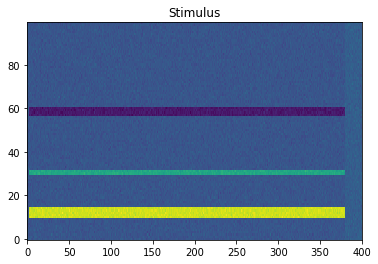

In [2]:
# make fake stim
# I assume the dimensions are frequency by time
# If not, then flip everything
mystim = np.zeros((100, 400))
mystim[10:15, :] = 10
mystim[30:32, :] = 5
mystim[57:61, :] = -3
mystim[:, 0:2] = 0
mystim[:, 380:400] = 0.5

# add noise
mystim= mystim + np.random.randn(*mystim.shape)  * 0.3

# show "stim"
plt.imshow(mystim, aspect = 'auto', origin = 'lower', interpolation = 'none')
plt.title('Stimulus')
plt.show()

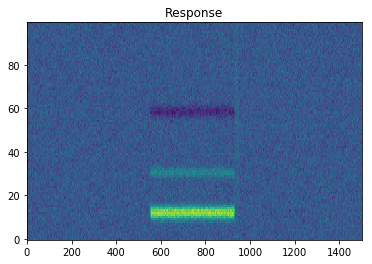

In [3]:
# make fake resp
myresp = np.zeros((100, 1500))

# 50 ms delay after the 500 ms prestim period
# "stim" is blurred with a gaussian filter
myresp[:, 550:950] = gaussian_filter(mystim, 1.5)

# add noise
myresp = myresp  + np.random.randn(*myresp.shape)  * 0.7

plt.imshow(myresp, aspect = 'auto', origin = 'lower', interpolation = 'none')
plt.title('Response')
plt.show()

In [12]:
# Perform cross correlation (2D)
# note the "valid" option
# this will prevent the correlation function messing around with the spectral dimension
mycross = correlate2d(myresp, mystim, mode = 'valid') 

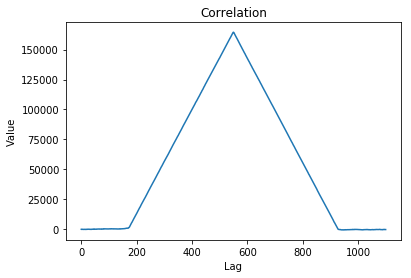

In [15]:
# plt.imshow(mycross, aspect = 'auto', origin = 'lower', interpolation = 'none')
# plt.title('Correlation')
# plt.show()
plt.plot(mycross.flatten())
plt.title('Correlation')
plt.xlabel('Lag')
plt.ylabel('Value')
plt.show()

In [6]:
mylag = np.where(mycross.flatten() == np.max(mycross.flatten()))[0] - 500
print(mylag)

[50]


In [7]:
# What if use don't use the "valid" mode?
mycross = correlate2d(myresp, mystim) 

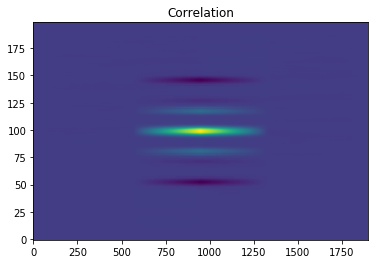

In [8]:
plt.imshow(mycross, aspect = 'auto', origin = 'lower', interpolation = 'none')
plt.title('Correlation')
plt.show()

In [24]:
mylag = np.where(mycross == np.max(mycross))
print(mylag)

(array([99]), array([949]))


In [11]:
print(mystim.shape)
print(myresp.shape)

(100, 400)
(100, 1500)


In [ ]:
# so the inference from above is that spectrally, there is no "lag" (since 99 is the center of range(0,199))
# temporally, i think "1899" is (mystim.shape[1] + myresp.shape[1] - 1), and therefore you would subtract 500 from 949,
# giving us the same value as the "valid" mode output
# but unless we're testing the hypothesis that the frequency might somehow be displaced, i think this is just more confusing